In [14]:
%pip install requests

In [15]:
%pip install bs4

Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url='https://news.naver.com/breakingnews/section/101/259'
res = requests.get(url).text
soup = BeautifulSoup(res)       # 파싱

temp = soup.select_one('ul.sa_list').select('li',limit=5)

In [17]:
new_list=[]
for li in temp:
    new_info = {'title':li.select_one('strong.sa_text_strong').text,
                'date':li.select_one('div.sa_text_datetime.is_recent').text,
                'news_url':li.select_one('a')['href']}
    # print(new_info)
    new_list.append(new_info)

new_list

[{'title': '수출입銀, 1Q 수출 1670억~1680억달러 전망…동기比 2~3%↑',
  'date': '\n1분전\n',
  'news_url': 'https://n.news.naver.com/mnews/article/030/0003281138'},
 {'title': 'KB금융 스타프렌즈 “아시안게임 국대 응원합니다”',
  'date': '\n1분전\n',
  'news_url': 'https://n.news.naver.com/mnews/article/018/0005936817'},
 {'title': '[포토]이복현 금감원장, "IPO 기업 사전·사후 회계심사 강화" 주문',
  'date': '\n2분전\n',
  'news_url': 'https://n.news.naver.com/mnews/article/018/0005936815'},
 {'title': '[포토]이복현 금감원장, 회계법인 CEO 만나',
  'date': '\n2분전\n',
  'news_url': 'https://n.news.naver.com/mnews/article/018/0005936814'},
 {'title': '[포토]금감원장, 회계법인 CEO 만나',
  'date': '\n2분전\n',
  'news_url': 'https://n.news.naver.com/mnews/article/018/0005936813'}]

In [18]:
print(temp[1].select_one('strong.sa_text_strong').text)                #기사제목
print(temp[1].select_one('div.sa_text_datetime.is_recent').text)       #시간     #공백은 (.) 이용하여 제거
print(temp[1].select_one('a')['href'])                                 #링크

KB금융 스타프렌즈 “아시안게임 국대 응원합니다”

1분전

https://n.news.naver.com/mnews/article/018/0005936817


In [19]:
# 뉴스 본문 가져오기
for new in new_list:
    new_url = new['news_url']
    #print(new_url)
    res = requests.get(new_url).text
    soup = BeautifulSoup(res)       # 파싱
    #print(soup)

    body = soup.select_one('article.go_trans._article_content')
    new_content = body.text.replace('\n','').strip()
    #print(new_content)
    new['news_content'] = new_content

df = pd.DataFrame(new_list)

df


,title,date,news_url,news_content
0,"수출입銀, 1Q 수출 1670억~1680억달러 전망…동기比 2~3%↑",\n1분전\n,https://n.news.naver.com/mnews/article/030/000...,수출입은행 해외경제연구소는 5일 '2024년 4분기 수출실적 평가 및 2025년 1...
1,KB금융 스타프렌즈 “아시안게임 국대 응원합니다”,\n1분전\n,https://n.news.naver.com/mnews/article/018/000...,하얼빈 동계 아시안게임 참가 선수들 응원[이데일리 김나경 기자] KB금융그룹이 그룹...
2,"[포토]이복현 금감원장, ""IPO 기업 사전·사후 회계심사 강화"" 주문",\n2분전\n,https://n.news.naver.com/mnews/article/018/000...,[이데일리 방인권 기자] 이복현 금융감독원장이 5일 서울 서대문구 한국공인회계사회관...
3,"[포토]이복현 금감원장, 회계법인 CEO 만나",\n2분전\n,https://n.news.naver.com/mnews/article/018/000...,[이데일리 방인권 기자] 이복현 금융감독원장이 5일 서울 서대문구 한국공인회계사회관...
4,"[포토]금감원장, 회계법인 CEO 만나",\n2분전\n,https://n.news.naver.com/mnews/article/018/000...,[이데일리 방인권 기자] 이복현 금융감독원장이 5일 서울 서대문구 한국공인회계사회관...


In [37]:
# 워드클라우드 시각화
from konlpy.tag import Okt
import collections

okt = Okt()

clist = []
for word in df['news_content']:
    token = okt.pos(word)
    for word,tag in token:
        if tag in ['Noun','Adjective']:
            clist.append(word)
counts = collections.Counter(clist)
tag = counts.most_common(100)
print(tag)

[('수출', 12), ('있다', 11), ('금융', 9), ('스타', 9), ('프렌즈', 9), ('것', 8), ('등', 6), ('간담', 6), ('회', 6), ('기업', 6), ('선수', 5), ('응원', 5), ('증가', 4), ('수', 4), ('하얼빈', 4), ('동계', 4), ('아시안', 4), ('게임', 4), ('이데일리', 4), ('기자', 4), ('그룹', 4), ('캐릭터', 4), ('가치', 4), ('전망', 3), ('지수', 3), ('세', 3), ('경기', 3), ('주요', 3), ('활용', 3), ('고객', 3), ('피겨', 3), ('국민은행', 3), ('방인', 3), ('이복', 3), ('현', 3), ('금융감독원장', 3), ('서울', 3), ('서대문구', 3), ('한국', 3), ('공인', 3), ('회계사', 3), ('회관', 3), ('회계법인', 3), ('최고경영자', 3), ('이', 3), ('원장', 3), ('날', 3), ('상장', 3), ('예정', 3), ('부정', 3), ('수단', 3), ('과도', 3), ('자본시장', 3), ('진입', 3), ('차단', 3), ('지난해', 2), ('수은', 2), ('하락', 2), ('선행', 2), ('유지', 2), ('있어', 2), ('예상', 2), ('별', 2), ('영향', 2), ('미국', 2), ('정책', 2), ('폭', 2), ('축소', 2), ('더', 2), ('말', 2), ('참가', 2), ('대표', 2), ('동계스포츠', 2), ('일러스트', 2), ('대한민국', 2), ('선수단', 2), ('키키', 2), ('거', 2), ('라무', 2), ('영역', 2), ('쇼트트랙', 2), ('통해', 2), ('다양한', 2), ('있는', 2), ('참여', 2), ('갤러리', 2), ('농구단', 2), ('메시지', 2), ('쇼트'

<>:7: SyntaxWarning: invalid escape sequence '\W'
<>:7: SyntaxWarning: invalid escape sequence '\W'
C:\Users\user\AppData\Local\Temp\ipykernel_13836\3261780013.py:7: SyntaxWarning: invalid escape sequence '\W'
  fpath ='C:\Windows\Fonts\malgunbd.ttf'


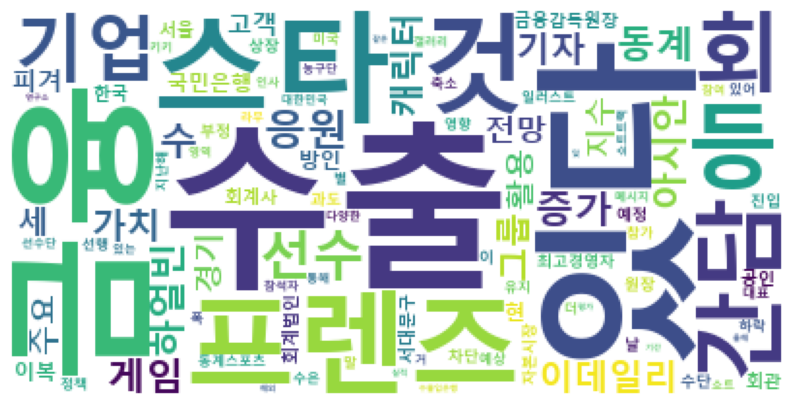

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

s_words=STOPWORDS.union({'있다','이','것'})       # 필요 없는 단어 제거

fpath ='C:\Windows\Fonts\malgunbd.ttf'
wc = WordCloud(font_path=fpath, background_color='white',stopwords=s_words)
cloud = wc.generate_from_frequencies(dict(tag))

plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)